In [563]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics

In [1029]:
df = pd.read_csv("/Users/zain/Downloads/wdbc.data", header= None)
df.head(3)

0  1      2      3      4       5        6        7       8   \
0    842302  M  17.99  10.38  122.8  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.9  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.0  1203.0  0.10960  0.15990  0.1974   

        9   ...     22     23     24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.6  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.8  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.5  1709.0  0.1444  0.4245  0.4504  0.2430   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.3613  0.08758  

[3 rows x 32 columns]

In [1030]:
attributes = []
for i in df.keys():
    attributes.append('feature_'+str(i))
c = 0
for i in attributes:
    df[i] = df[c]
    df = df.drop([c],axis=1)
    c+=1

In [1031]:
df.head(3)

feature_0 feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0     842302         M      17.99      10.38      122.8     1001.0    0.11840   
1     842517         M      20.57      17.77      132.9     1326.0    0.08474   
2   84300903         M      19.69      21.25      130.0     1203.0    0.10960   

   feature_7  feature_8  feature_9  ...  feature_22  feature_23  feature_24  \
0    0.27760     0.3001    0.14710  ...       25.38       17.33       184.6   
1    0.07864     0.0869    0.07017  ...       24.99       23.41       158.8   
2    0.15990     0.1974    0.12790  ...       23.57       25.53       152.5   

   feature_25  feature_26  feature_27  feature_28  feature_29  feature_30  \
0      2019.0      0.1622      0.6656      0.7119      0.2654      0.4601   
1      1956.0      0.1238      0.1866      0.2416      0.1860      0.2750   
2      1709.0      0.1444      0.4245      0.4504      0.2430      0.3613   

   feature_31  
0     0.11890  
1     0.08902  
2     0.08758  

[3 rows x 32 columns]

# I could go about the analysis with just feature_n as my header names 
## However the appropriate header names is available 

In [1032]:
# clean version
df = pd.read_csv("/Users/zain/Downloads/data.csv")
df = df.drop(columns = ['Unnamed: 32'])
df.head(3)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38           122.8     1001.0   
1    842517         M        20.57         17.77           132.9     1326.0   
2  84300903         M        19.69         21.25           130.0     1203.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33            184.6      2019.0   
1  ...         24.99          23.41            158.8      1956.0   
2  ...         23.57          25.53            152.5      1709.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  

[3 rows x 32 columns]

In [1033]:
df.shape

(569, 32)

In [1034]:
df['Diagnosis_numerical'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0) # Assigning 1 -> M, 0 -> B

In [1035]:
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Diagnosis_numerical  
0                    0.11890                    1  
1                    0.08902                    1  
2                    0.08758                    1  
3                  

In [1036]:
test = pd.concat([df.loc[(df['diagnosis'] == 'M')][0:30],
                  df.loc[(df['diagnosis'] == 'B')][0:50]])

X_test = test.drop(columns = ['diagnosis','Diagnosis_numerical','id'])
y_test = test['Diagnosis_numerical']

train = pd.concat([df.loc[(df['diagnosis'] == 'M')][30:],
                   df.loc[(df['diagnosis'] == 'B')][50:]])

X_train = train.drop(columns = ['diagnosis','Diagnosis_numerical','id'])
y_train = train['Diagnosis_numerical']

In [1037]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((80, 30), (80,), (489, 30), (489,))

In [1038]:
test.shape, train.shape, train.shape[0]+test.shape[0] == 569

((80, 33), (489, 33), True)

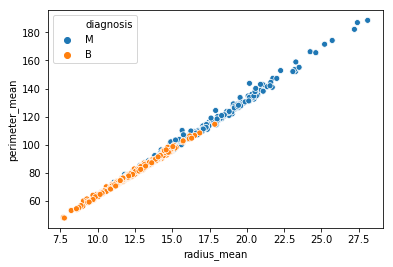

In [1039]:
sns.scatterplot(data=train, x="radius_mean", y="perimeter_mean", hue="diagnosis")

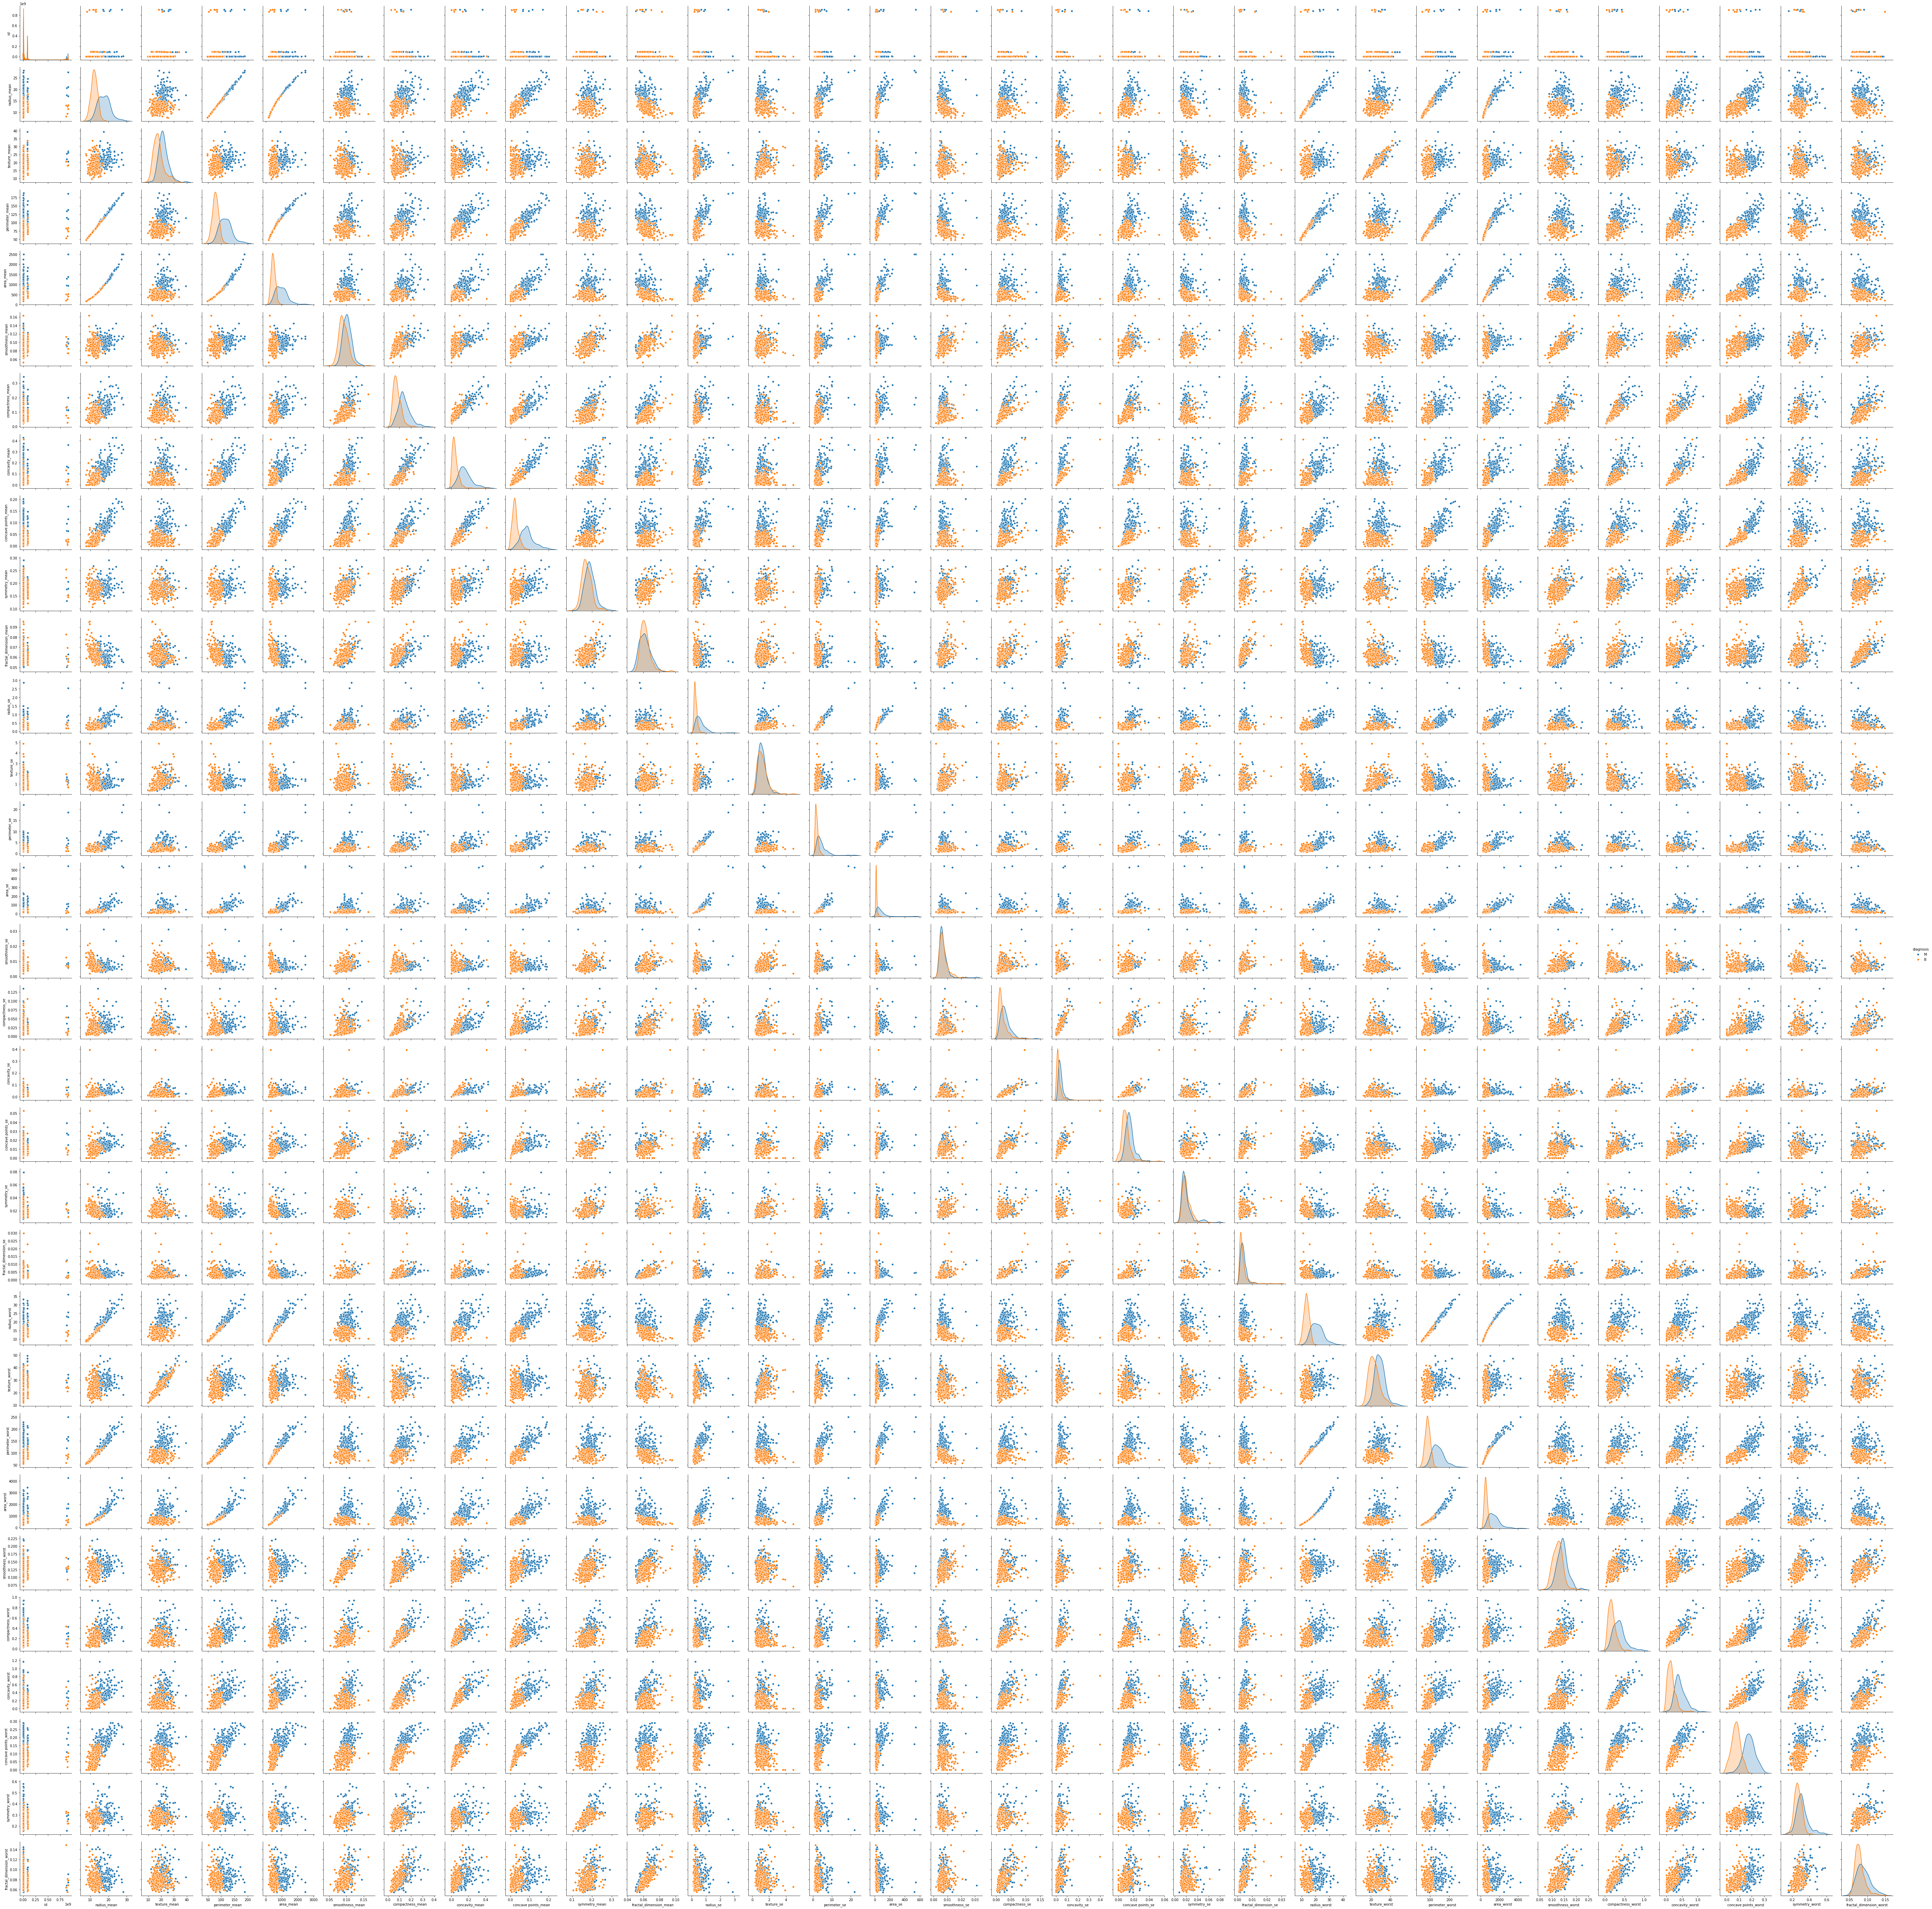

In [8]:
sns.pairplot(train, hue="diagnosis")

# Q1c(II) Test set

In [1040]:
lr = LogisticRegression(max_iter=10000) # Max_iter -> to avoid convergence warning due to class seperability 
lr.fit(X_train, y_train)
# Expected warning 

LogisticRegression(max_iter=10000)

In [1041]:
pred = lr.predict(X_test)
print(metrics.accuracy_score(y_test,pred))

0.9875


In [1042]:
r_probs = [i for i in range(len(y_test))]
r_auc = roc_auc_score(y_test, r_probs)

In [1043]:
cm = confusion_matrix(y_test,pred)
print(cm)

[[50  0]
 [ 1 29]]


In [1044]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.97      0.98        30

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



In [1045]:
probas = lr.predict_proba(X_test)[:, 1]

In [1046]:
fpr, tpr, _ = roc_curve(y_test, pred.reshape(-1,1), pos_label = 1)
logit_roc_auc = roc_auc_score(y_test, pred.reshape(-1,1))

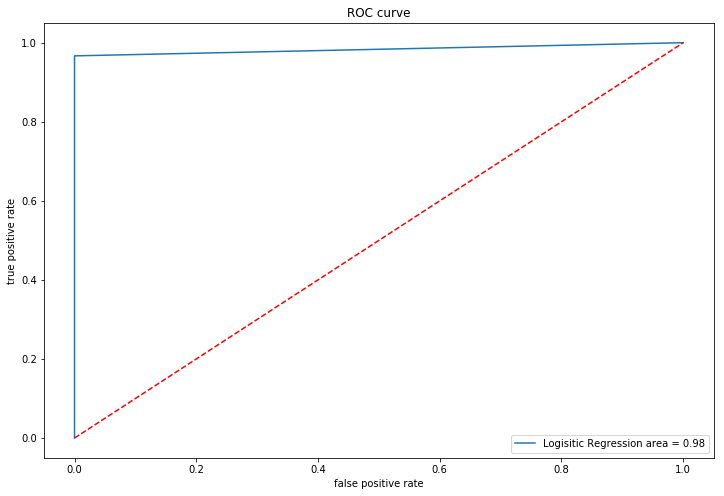

In [1047]:
plt.figure(figsize = (12,8))
plt.plot(fpr,tpr, label = 'Logisitic Regression area = %0.2f'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.title("ROC curve")
plt.legend(loc = "lower right")
plt.show()

# Q1c(II) Train Set

In [1048]:
#lr = LogisticRegression(max_iter=10000)
#lr.fit(X_train, y_train) - has already been previously fitted

pred = lr.predict(X_train)
print(metrics.accuracy_score(y_train,pred))

0.9529652351738241


In [1049]:
cm = confusion_matrix(y_train,pred)
print(cm)

[[298   9]
 [ 14 168]]


In [1050]:
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       307
           1       0.95      0.92      0.94       182

    accuracy                           0.95       489
   macro avg       0.95      0.95      0.95       489
weighted avg       0.95      0.95      0.95       489



In [1051]:
fpr, tpr, _ = roc_curve(y_train, pred.reshape(-1,1), pos_label = 1)

In [1052]:
logit_roc_auc = roc_auc_score(y_train, pred.reshape(-1,1))

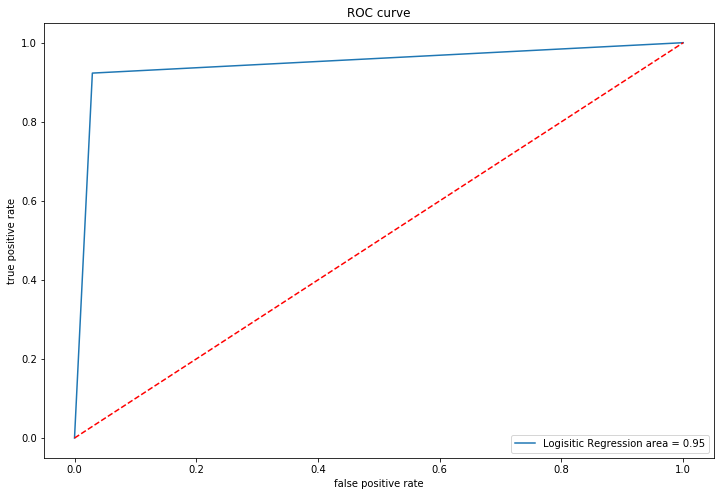

In [1053]:
plt.figure(figsize = (12,8))
plt.plot(fpr,tpr, label = 'Logisitic Regression area = %0.2f'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.title("ROC curve")
plt.legend(loc = "lower right")
plt.show()

In [1054]:
# One method to get signifcance of interaction between X and Y is mutliply X_Coef by each std 
print(np.std(X_train, 0)*lr.coef_[0])

radius_mean               -3.075143
texture_mean              -0.888792
perimeter_mean             6.529491
area_mean                 -8.657214
smoothness_mean            0.002249
compactness_mean           0.008434
concavity_mean             0.039977
concave points_mean        0.010983
symmetry_mean              0.005836
fractal_dimension_mean     0.000134
radius_se                  0.009387
texture_se                -0.638261
perimeter_se              -0.227201
area_se                    5.007723
smoothness_se              0.000070
compactness_se            -0.001493
concavity_se               0.000979
concave points_se          0.000229
symmetry_se                0.000122
fractal_dimension_se      -0.000040
radius_worst              -1.212881
texture_worst              2.664598
perimeter_worst            3.100302
area_worst                 9.124601
smoothness_worst           0.007302
compactness_worst          0.071927
concavity_worst            0.271867
concave points_worst       0

In [1055]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.7733938119701154

# Q1c(III) Pruning process 

In [1056]:
import statsmodels.tools as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.regression.linear_model

mlr = statsmodels.regression.linear_model.OLS(y_train,X_train).fit()

In [1057]:
print(mlr.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Diagnosis_numerical   R-squared (uncentered):                   0.852
Model:                             OLS   Adj. R-squared (uncentered):              0.843
Method:                  Least Squares   F-statistic:                              88.35
Date:                 Fri, 26 Mar 2021   Prob (F-statistic):                   4.52e-170
Time:                         17:56:10   Log-Likelihood:                          15.553
No. Observations:                  489   AIC:                                      28.89
Df Residuals:                      459   BIC:                                      154.7
Df Model:                           30                                                  
Covariance Type:             nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [1087]:
import statsmodels.discrete.discrete_model as sm
logit = sm.Logit(y_train,X_train, max_iter = 1000).fit(method='ncg') # Logistic regression without scaling

Optimization terminated successfully.
         Current function value: 0.437337
         Iterations: 4
         Function evaluations: 6
         Gradient evaluations: 9
         Hessian evaluations: 4


In [1088]:
print(logit.summary())

                            Logit Regression Results                           
Dep. Variable:     Diagnosis_numerical   No. Observations:                  489
Model:                           Logit   Df Residuals:                      459
Method:                            MLE   Df Model:                           29
Date:                 Fri, 26 Mar 2021   Pseudo R-squ.:                  0.3375
Time:                         18:12:13   Log-Likelihood:                -213.86
converged:                        True   LL-Null:                       -322.79
Covariance Type:             nonrobust   LLR p-value:                 7.672e-31
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
radius_mean                -0.0011      1.918     -0.001      1.000      -3.759       3.757
texture_mean               -0.0021      0.083     -0.025      0.980      -0.165     

# Without scaling the logit p-values are quite large 

In [1089]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) # For the logit model

In [1094]:
import statsmodels.discrete.discrete_model as sm
logit = sm.Logit(y_train,X_train_scaled, max_iter = 1000).fit(method='ncg')

         Current function value: 0.013604
         Iterations: 35
         Function evaluations: 44
         Gradient evaluations: 78
         Hessian evaluations: 35


/Users/zain/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [1095]:
print(logit.summary())

                            Logit Regression Results                           
Dep. Variable:     Diagnosis_numerical   No. Observations:                  489
Model:                           Logit   Df Residuals:                      459
Method:                            MLE   Df Model:                           29
Date:                 Fri, 26 Mar 2021   Pseudo R-squ.:                  0.9794
Time:                         18:24:26   Log-Likelihood:                -6.6524
converged:                       False   LL-Null:                       -322.79
Covariance Type:             nonrobust   LLR p-value:                1.275e-114
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -2039.9262   1413.938     -1.443      0.149   -4811.194     731.342
x2           -26.3771     40.205     -0.656      0.512    -105.177      52.423
x3          -315.6263   1197.301     -0.264 

In [1097]:
# Reason for my 10% threshold is simply there are not many variables that are signifcant at the 5% or even 1% threshold
p_vals_index = []
index = -1
for attributeIndex in range (0, len(X_train.keys())):
    index += 1
    if logit.pvalues[attributeIndex] < 0.10:
        p_vals_index.append(index)
p_vals_10 = X_train[X_train.keys()[p_vals_index]]

In [1098]:
X_train = p_vals_10

In [1099]:
X_train.dtypes

smoothness_mean         float64
compactness_mean        float64
concave points_mean     float64
symmetry_mean           float64
radius_se               float64
area_se                 float64
concavity_se            float64
concave points_se       float64
symmetry_se             float64
fractal_dimension_se    float64
smoothness_worst        float64
symmetry_worst          float64
dtype: object

# Refitted model - Train set

### This cell where max_iter is set to 10000 is because the default value is not able to compute it, due to class seperability

In [602]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [603]:
pred = lr.predict(X_train)
print(metrics.accuracy_score(y_train,pred))

0.9406952965235174


In [604]:
cm = confusion_matrix(y_train,pred)
print(cm)

[[296  11]
 [ 18 164]]


In [605]:
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       307
           1       0.94      0.90      0.92       182

    accuracy                           0.94       489
   macro avg       0.94      0.93      0.94       489
weighted avg       0.94      0.94      0.94       489



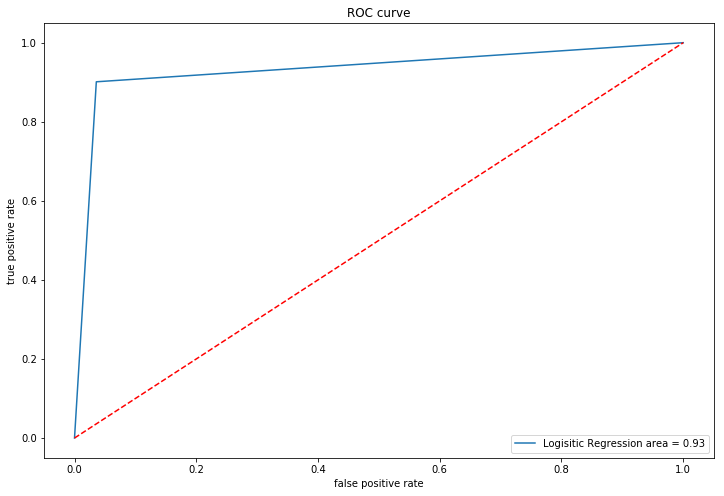

In [606]:
fpr, tpr, _ = roc_curve(y_train, pred.reshape(-1,1), pos_label = 1)
logit_roc_auc = roc_auc_score(y_train, pred.reshape(-1,1))

plt.figure(figsize = (12,8))
plt.plot(fpr,tpr, label = 'Logisitic Regression area = %0.2f'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.title("ROC curve")
plt.legend(loc = "lower right")
plt.show()

# Refitted model - Test Set

In [607]:
X_test_2 = X_test[p_vals_10.keys()]

In [609]:
X_test_2.head(3) # making sure it pulled the needed columns 

area_mean  concave points_mean  fractal_dimension_mean  smoothness_se  \
0     1001.0              0.14710                 0.07871       0.006399   
1     1326.0              0.07017                 0.05667       0.005225   
2     1203.0              0.12790                 0.05999       0.006150   

   concavity_se  radius_worst  area_worst  concavity_worst  \
0       0.05373         25.38      2019.0           0.7119   
1       0.01860         24.99      1956.0           0.2416   
2       0.03832         23.57      1709.0           0.4504   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758

In [610]:
pred = lr.predict(X_test_2)
print(metrics.accuracy_score(y_test,pred))

0.95


Text(0.5, 0, 'Data')

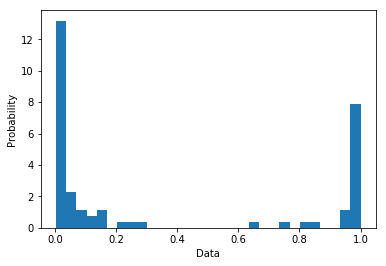

In [615]:
hist = []
for _, i in enumerate(lr.predict_proba(X_test_2)):
    hist.append(i[1])
    
np.random.seed(42)
x = np.random.normal(size=10000)

plt.hist(hist, density=True, bins=30) 
plt.ylabel('Probability')
plt.xlabel('Data')

In [617]:
r_probs = [i for i in range(len(y_test))]
r_auc = roc_auc_score(y_test, r_probs)

In [619]:
cm = confusion_matrix(y_test,pred)
print(cm)

[[49  1]
 [ 3 27]]


In [620]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        50
           1       0.96      0.90      0.93        30

    accuracy                           0.95        80
   macro avg       0.95      0.94      0.95        80
weighted avg       0.95      0.95      0.95        80



In [621]:
fpr, tpr, _ = roc_curve(y_test, pred.reshape(-1,1), pos_label = 1)
logit_roc_auc = roc_auc_score(y_test, pred.reshape(-1,1))

In [622]:
#fpr, tpr, _ = roc_curve(y_test, lr.predict(X_test_2), pos_label = 1)
#logit_roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test_2)[:,1])

In [623]:
logit_roc_auc

0.94

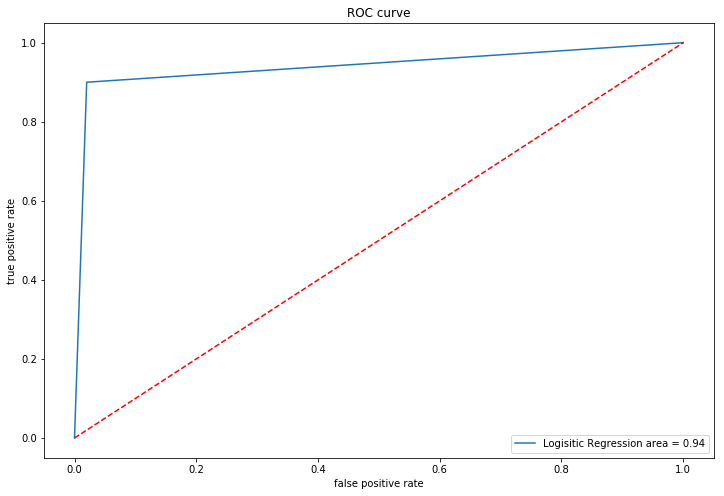

In [624]:
plt.figure(figsize = (12,8))
plt.plot(fpr,tpr, label = 'Logisitic Regression area = %0.2f'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.title("ROC curve")
plt.legend(loc = "lower right")
plt.show()

# Q1 C(IV)

## So the best way to identify class seperability in this situation is to just re-run the logistic regression function and fit our data set to it w/o implementing max_iter

In [1008]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/Users/zain/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

# The convergence warning is due to the instability that is caused when calculating classes that are very well seperated, as in our case. When we apply the max_iter method within our Logistic regression method, and set that value to a sizeable amount, we notice no convergence warning

In [1009]:
lr = LogisticRegression(max_iter = 10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

# Breast Cancer Prognosis

# Q2 A-C

In [701]:
df = pd.read_csv("/Users/zain/Downloads/wpbc.data", header = None)

In [702]:
attributes = []
for i in df.keys():
    attributes.append('feature_'+str(i))
c = 0
for i in attributes:
    df[i] = df[c]
    df = df.drop([c],axis=1)
    c+=1

In [703]:
df.head(3)

feature_0 feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0     119513         N         31      18.02      27.60      117.5     1013.0   
1       8423         N         61      17.99      10.38      122.8     1001.0   
2     842517         N        116      21.37      17.44      137.5     1373.0   

   feature_7  feature_8  feature_9  ...  feature_25  feature_26  feature_27  \
0    0.09489     0.1036     0.1086  ...       139.7      1436.0      0.1195   
1    0.11840     0.2776     0.3001  ...       184.6      2019.0      0.1622   
2    0.08836     0.1189     0.1255  ...       159.1      1949.0      0.1188   

   feature_28  feature_29  feature_30  feature_31  feature_32  feature_33  \
0      0.1926      0.3140      0.1170      0.2677     0.08113         5.0   
1      0.6656      0.7119      0.2654      0.4601     0.11890         3.0   
2      0.3449      0.3414      0.2032      0.4334     0.09067         2.5   

   feature_34  
0           5  
1           2  
2           0  

[3 rows x 35 columns]

# We wont need feature_0, feature_2

In [704]:
df = df.drop(['feature_0','feature_2'], axis = 1)

In [705]:
df.head(3)

feature_1  feature_3  feature_4  feature_5  feature_6  feature_7  feature_8  \
0         N      18.02      27.60      117.5     1013.0    0.09489     0.1036   
1         N      17.99      10.38      122.8     1001.0    0.11840     0.2776   
2         N      21.37      17.44      137.5     1373.0    0.08836     0.1189   

   feature_9  feature_10  feature_11  ...  feature_25  feature_26  feature_27  \
0     0.1086     0.07055      0.1865  ...       139.7      1436.0      0.1195   
1     0.3001     0.14710      0.2419  ...       184.6      2019.0      0.1622   
2     0.1255     0.08180      0.2333  ...       159.1      1949.0      0.1188   

   feature_28  feature_29  feature_30  feature_31  feature_32  feature_33  \
0      0.1926      0.3140      0.1170      0.2677     0.08113         5.0   
1      0.6656      0.7119      0.2654      0.4601     0.11890         3.0   
2      0.3449      0.3414      0.2032      0.4334     0.09067         2.5   

   feature_34  
0           5  
1           2  
2           0  

[3 rows x 33 columns]

In [706]:
df = df.rename(columns={"feature_1": "predictive_feature"})

In [707]:
df['predictive_feature_num'] = df['predictive_feature'].apply(lambda x: 1 if x == 'N' else 0)

In [708]:
df = df.drop(['predictive_feature'], axis = 1)

In [709]:
df.head(3)

feature_3  feature_4  feature_5  feature_6  feature_7  feature_8  \
0      18.02      27.60      117.5     1013.0    0.09489     0.1036   
1      17.99      10.38      122.8     1001.0    0.11840     0.2776   
2      21.37      17.44      137.5     1373.0    0.08836     0.1189   

   feature_9  feature_10  feature_11  feature_12  ...  feature_26  feature_27  \
0     0.1086     0.07055      0.1865     0.06333  ...      1436.0      0.1195   
1     0.3001     0.14710      0.2419     0.07871  ...      2019.0      0.1622   
2     0.1255     0.08180      0.2333     0.06010  ...      1949.0      0.1188   

   feature_28  feature_29  feature_30  feature_31  feature_32  feature_33  \
0      0.1926      0.3140      0.1170      0.2677     0.08113         5.0   
1      0.6656      0.7119      0.2654      0.4601     0.11890         3.0   
2      0.3449      0.3414      0.2032      0.4334     0.09067         2.5   

   feature_34  predictive_feature_num  
0           5                       1  
1           2                       1  
2           0                       1  

[3 rows x 33 columns]

In [710]:
len(df.keys())

33

# 1 outcome var, 30 outcome vars and and extra 2 outcome vars {diameter of the excised tumor in centimeters and the number of positive axillary lymph nodes}

In [711]:
df.describe()

feature_3  feature_4   feature_5    feature_6   feature_7   feature_8  \
count  198.000000  198.00000  198.000000   198.000000  198.000000  198.000000   
mean    17.412323   22.27601  114.856566   970.040909    0.102681    0.142648   
std      3.161676    4.29829   21.383402   352.149215    0.012522    0.049898   
min     10.950000   10.38000   71.900000   361.600000    0.074970    0.046050   
25%     15.052500   19.41250   98.160000   702.525000    0.093900    0.110200   
50%     17.290000   21.75000  113.700000   929.100000    0.101900    0.131750   
75%     19.580000   24.65500  129.650000  1193.500000    0.110975    0.172200   
max     27.220000   39.28000  182.100000  2250.000000    0.144700    0.311400   

        feature_9  feature_10  feature_11  feature_12  ...  feature_25  \
count  198.000000  198.000000  198.000000  198.000000  ...  198.000000   
mean     0.156243    0.086776    0.192754    0.062706  ...  140.347778   
std      0.070572    0.033877    0.027437    0.007240  ...   28.892279   
min      0.023980    0.020310    0.130800    0.050250  ...   85.100000   
25%      0.106850    0.063670    0.174075    0.056718  ...  118.075000   
50%      0.151350    0.086075    0.189350    0.061715  ...  136.500000   
75%      0.200500    0.103925    0.209325    0.066715  ...  159.875000   
max      0.426800    0.201200    0.304000    0.097440  ...  232.200000   

        feature_26  feature_27  feature_28  feature_29  feature_30  \
count   198.000000  198.000000  198.000000  198.000000  198.000000   
mean   1404.958586    0.143921    0.365102    0.436685    0.178778   
std     586.006972    0.022004    0.163965    0.173625    0.045181   
min     508.100000    0.081910    0.051310    0.023980    0.028990   
25%     947.275000    0.129325    0.248700    0.322150    0.152650   
50%    1295.000000    0.141850    0.351300    0.402350    0.179250   
75%    1694.250000    0.154875    0.423675    0.541050    0.207125   
max    3903.000000    0.222600    1.058000    1.170000    0.290300   

       feature_31  feature_32  feature_33  predictive_feature_num  
count  198.000000  198.000000  198.000000              198.000000  
mean     0.323404    0.090828    2.847475                0.762626  
std      0.075161    0.021172    1.937964                0.426552  
min      0.156500    0.055040    0.400000                0.000000  
25%      0.275950    0.076578    1.500000                1.000000  
50%      0.310300    0.086890    2.500000                1.000000  
75%      0.358800    0.101375    3.500000                1.000000  
max      0.663800    0.207500   10.000000                1.000000  

[8 rows x 32 columns]

In [712]:
for _,i in enumerate(df['feature_34']):
    if i == '?':
        print(_,i)

6 ?
28 ?
85 ?
196 ?


In [713]:
df = df.apply(pd.to_numeric, errors = 'coerce')

In [714]:
train = pd.concat([df.loc[(df['predictive_feature_num'] == 1)][:130],
                   df.loc[(df['predictive_feature_num'] == 0)][:37]])
train = train.append(df.iloc[196])

X_train = train.drop(columns = ['predictive_feature_num'])
y_train = train['predictive_feature_num']

In [715]:
df = df.drop(df.index[196]) 
# Although the HW said row 197, when I was in T.A. office hours we realized its row 196 that containts the "?"
# so that has already been appended to train

In [716]:
df.shape # because row 197 is now inside train

(197, 33)

In [717]:
test = pd.concat([df.loc[(df['predictive_feature_num'] == 1)][130:],
                   df.loc[(df['predictive_feature_num'] == 0)][37:]])

X_test = test.drop(columns = ['predictive_feature_num'])
y_test = test['predictive_feature_num']


In [718]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'median')

imp_mean.fit(X_train)
X_train = imp_mean.transform(X_train)

In [719]:
imp_mean.fit(X_test)
X_test = imp_mean.transform(X_test)

In [720]:
len(test), len(train), len(test) + len(train)

(30, 168, 198)

In [721]:
len(y_train) , len(y_test)

(168, 30)

# Q2d(I)

In [646]:
from sklearn.naive_bayes import GaussianNB

In [647]:
gnb = GaussianNB()

In [648]:
gnb.fit(X_train,y_train)

GaussianNB()

In [649]:
gnb_pred = gnb.predict(X_train)

In [650]:
print(metrics.accuracy_score(y_train,gnb_pred))

0.6904761904761905


In [651]:
cm = confusion_matrix(y_train,gnb_pred)
print(cm)

[[18 20]
 [32 98]]


In [652]:
print(classification_report(y_train, gnb_pred))

              precision    recall  f1-score   support

         0.0       0.36      0.47      0.41        38
         1.0       0.83      0.75      0.79       130

    accuracy                           0.69       168
   macro avg       0.60      0.61      0.60       168
weighted avg       0.72      0.69      0.70       168



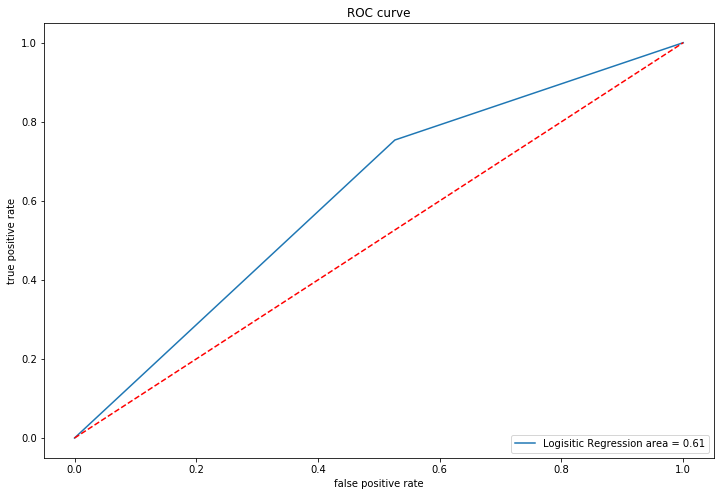

In [653]:
fpr, tpr, _ = roc_curve(y_train, gnb_pred.reshape(-1,1), pos_label = 1)
logit_roc_auc = roc_auc_score(y_train, gnb_pred.reshape(-1,1))

plt.figure(figsize = (12,8))
plt.plot(fpr,tpr, label = 'Logisitic Regression area = %0.2f'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.title("ROC curve")
plt.legend(loc = "lower right")
plt.show()

In [654]:
gnb_pred = gnb.predict(X_test)

In [655]:
print(metrics.accuracy_score(y_test,gnb_pred))

0.5666666666666667


In [656]:
cm = confusion_matrix(y_test,gnb_pred)
print(cm)

[[ 3  6]
 [ 7 14]]


In [657]:
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.30      0.33      0.32         9
           1       0.70      0.67      0.68        21

    accuracy                           0.57        30
   macro avg       0.50      0.50      0.50        30
weighted avg       0.58      0.57      0.57        30



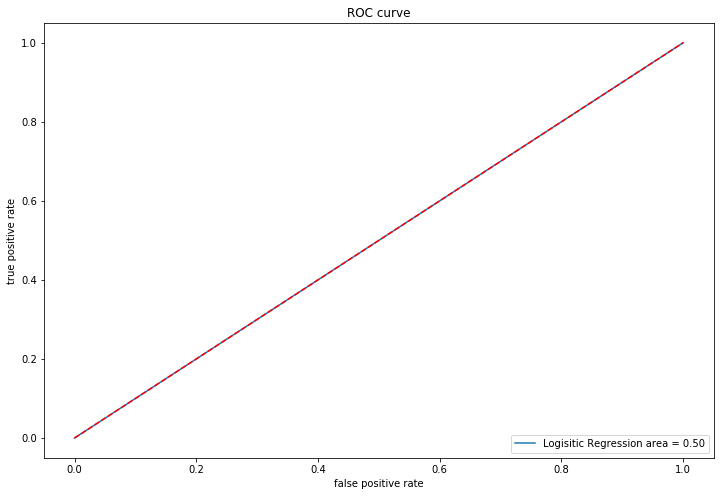

In [658]:
fpr, tpr, _ = roc_curve(y_test, gnb_pred.reshape(-1,1), pos_label = 1)
logit_roc_auc = roc_auc_score(y_test, gnb_pred.reshape(-1,1))

plt.figure(figsize = (12,8))
plt.plot(fpr,tpr, label = 'Logisitic Regression area = %0.2f'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.title("ROC curve")
plt.legend(loc = "lower right")
plt.show()

# Q2d(II)

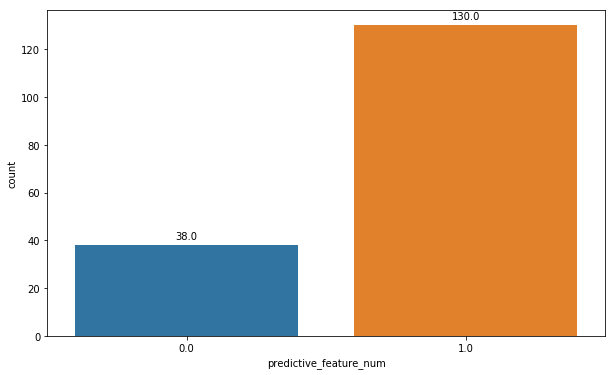

In [977]:
plt.figure(figsize = (10,6))
countplot = sns.countplot(x='predictive_feature_num', data=train)
for p in countplot.patches:
    countplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# 1 = Non-recurring , 0 = Recurring

In [978]:
train_smote = train

In [979]:
train_smote

feature_3  feature_4  feature_5  feature_6  feature_7  feature_8  \
0        18.02      27.60     117.50     1013.0    0.09489    0.10360   
1        17.99      10.38     122.80     1001.0    0.11840    0.27760   
2        21.37      17.44     137.50     1373.0    0.08836    0.11890   
3        11.42      20.38      77.58      386.1    0.14250    0.28390   
6        18.98      19.61     124.40     1112.0    0.09087    0.12370   
..         ...        ...        ...        ...        ...        ...   
132      15.08      25.74      98.00      716.6    0.10240    0.09769   
135      22.01      21.90     147.20     1482.0    0.10630    0.19540   
143      15.50      21.08     102.90      803.1    0.11200    0.15710   
145      20.18      19.54     133.80     1250.0    0.11330    0.14890   
196      21.42      22.84     145.00     1440.0    0.10700    0.19390   

     feature_9  feature_10  feature_11  feature_12  ...  feature_26  \
0       0.1086     0.07055      0.1865     0.06333  ...      1436.0   
1       0.3001     0.14710      0.2419     0.07871  ...      2019.0   
2       0.1255     0.08180      0.2333     0.06010  ...      1949.0   
3       0.2414     0.10520      0.2597     0.09744  ...       567.7   
6       0.1213     0.08910      0.1727     0.05767  ...      1593.0   
..         ...         ...         ...         ...  ...         ...   
132     0.1235     0.06553      0.1647     0.06464  ...      1050.0   
135     0.2448     0.15010      0.1824     0.06140  ...      2227.0   
143     0.1522     0.08481      0.2085     0.06864  ...      1748.0   
145     0.2133     0.12590      0.1724     0.06053  ...      1479.0   
196     0.2380     0.13180      0.1884     0.06472  ...      2375.0   

     feature_27  feature_28  feature_29  feature_30  feature_31  feature_32  \
0        0.1195      0.1926      0.3140      0.1170      0.2677     0.08113   
1        0.1622      0.6656      0.7119      0.2654      0.4601     0.11890   
2        0.1188      0.3449      0.3414      0.2032      0.4334     0.09067   
3        0.2098      0.8663      0.6869      0.2575      0.6638     0.17300   
6        0.1144      0.3371      0.2990      0.1922      0.2726     0.09581   
..          ...         ...         ...         ...         ...         ...   
132      0.1660      0.2356      0.4029      0.1526      0.2654     0.09438   
135      0.1294      0.3885      0.4756      0.2432      0.2741     0.08574   
143      0.1517      0.4002      0.4211      0.2134      0.3003     0.10480   
145      0.1665      0.2942      0.5308      0.2173      0.3032     0.08075   
196      0.1498      0.4379      0.5411      0.2215      0.2832     0.08981   

     feature_33  feature_34  predictive_feature_num  
0           5.0         5.0                     1.0  
1           3.0         2.0                     1.0  
2           2.5         0.0                     1.0  
3           2.0         0.0                     1.0  
6           1.5         NaN                     1.0  
..          ...         ...                     ...  
132         2.6         0.0                     0.0  
135         3.0         1.0                     0.0  
143         0.4         0.0                     0.0  
145         4.5        27.0                     0.0  
196         3.0         NaN                     0.0  

[168 rows x 33 columns]

In [980]:
train_smote = train_smote.fillna(train_smote['feature_34'].median())

In [981]:
train_smote_n = train_smote.loc[(train_smote['predictive_feature_num'] == 1)]
train_smote_n

feature_3  feature_4  feature_5  feature_6  feature_7  feature_8  \
0        18.02      27.60     117.50     1013.0    0.09489    0.10360   
1        17.99      10.38     122.80     1001.0    0.11840    0.27760   
2        21.37      17.44     137.50     1373.0    0.08836    0.11890   
3        11.42      20.38      77.58      386.1    0.14250    0.28390   
6        18.98      19.61     124.40     1112.0    0.09087    0.12370   
..         ...        ...        ...        ...        ...        ...   
169      20.92      25.09     143.00     1347.0    0.10990    0.22360   
170      21.56      22.39     142.00     1479.0    0.11100    0.11590   
171      20.13      28.25     131.20     1261.0    0.09780    0.10340   
172      16.60      28.08     108.30      858.1    0.08455    0.10230   
173      13.86      23.83      89.60      595.8    0.10670    0.08318   

     feature_9  feature_10  feature_11  feature_12  ...  feature_26  \
0      0.10860     0.07055      0.1865     0.06333  ...      1436.0   
1      0.30010     0.14710      0.2419     0.07871  ...      2019.0   
2      0.12550     0.08180      0.2333     0.06010  ...      1949.0   
3      0.24140     0.10520      0.2597     0.09744  ...       567.7   
6      0.12130     0.08910      0.1727     0.05767  ...      1593.0   
..         ...         ...         ...         ...  ...         ...   
169    0.31740     0.14740      0.2149     0.06879  ...      1819.0   
170    0.24390     0.13890      0.1726     0.05623  ...      2027.0   
171    0.14400     0.09791      0.1752     0.05533  ...      1731.0   
172    0.09251     0.05302      0.1590     0.05648  ...      1124.0   
173    0.07671     0.05627      0.1433     0.05484  ...       730.6   

     feature_27  feature_28  feature_29  feature_30  feature_31  feature_32  \
0        0.1195      0.1926      0.3140      0.1170      0.2677     0.08113   
1        0.1622      0.6656      0.7119      0.2654      0.4601     0.11890   
2        0.1188      0.3449      0.3414      0.2032      0.4334     0.09067   
3        0.2098      0.8663      0.6869      0.2575      0.6638     0.17300   
6        0.1144      0.3371      0.2990      0.1922      0.2726     0.09581   
..          ...         ...         ...         ...         ...         ...   
169      0.1407      0.4186      0.6599      0.2542      0.2929     0.09873   
170      0.1410      0.2113      0.4107      0.2216      0.2060     0.07115   
171      0.1166      0.1922      0.3215      0.1628      0.2572     0.06637   
172      0.1139      0.3094      0.3403      0.1418      0.2218     0.07820   
173      0.1467      0.1279      0.1677      0.1114      0.2180     0.06057   

     feature_33  feature_34  predictive_feature_num  
0           5.0         5.0                     1.0  
1           3.0         2.0                     1.0  
2           2.5         0.0                     1.0  
3           2.0         0.0                     1.0  
6           1.5         1.0                     1.0  
..          ...         ...                     ...  
169         1.5         0.0                     1.0  
170         1.2         0.0                     1.0  
171         1.0         0.0                     1.0  
172         3.5         1.0                     1.0  
173         1.5         1.0                     1.0  

[130 rows x 33 columns]

# Since we only want 90 and the common class has 130, removing 40 is needed

## Since Imbleanr undersampler was giving me alot of issues with the installs 
## I wrote up a little script to do random undersampling 

#### this was approved by a TA

In [982]:
all_indexs = [i for i in train_smote_n.index]
len(all_indexs) # this length equals the amount of all the possible 1 class

130

In [983]:
import random 

drop_index = []
drop_index.append(random.sample(range(len(all_indexs)-50), 40))

In [984]:
indexs_dropped = []
for i in drop_index[0]:
    indexs_dropped.append(all_indexs[i])

In [985]:
len(all_indexs), len(indexs_dropped)

(130, 40)

In [986]:
train_smote_n_2 = train_smote.drop(train_smote.index[drop_index])

/Users/zain/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:4107: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [987]:
train_smote_n_2

feature_3  feature_4  feature_5  feature_6  feature_7  feature_8  \
0        18.02      27.60     117.50     1013.0    0.09489    0.10360   
1        17.99      10.38     122.80     1001.0    0.11840    0.27760   
8        13.00      21.82      87.50      519.8    0.12730    0.19320   
9        12.46      24.04      83.97      475.9    0.11860    0.23960   
10       16.02      23.24     102.70      797.8    0.08206    0.06669   
..         ...        ...        ...        ...        ...        ...   
132      15.08      25.74      98.00      716.6    0.10240    0.09769   
135      22.01      21.90     147.20     1482.0    0.10630    0.19540   
143      15.50      21.08     102.90      803.1    0.11200    0.15710   
145      20.18      19.54     133.80     1250.0    0.11330    0.14890   
196      21.42      22.84     145.00     1440.0    0.10700    0.19390   

     feature_9  feature_10  feature_11  feature_12  ...  feature_26  \
0      0.10860     0.07055      0.1865     0.06333  ...      1436.0   
1      0.30010     0.14710      0.2419     0.07871  ...      2019.0   
8      0.18590     0.09353      0.2350     0.07389  ...       739.3   
9      0.22730     0.08543      0.2030     0.08243  ...       711.4   
10     0.03299     0.03323      0.1528     0.05697  ...      1150.0   
..         ...         ...         ...         ...  ...         ...   
132    0.12350     0.06553      0.1647     0.06464  ...      1050.0   
135    0.24480     0.15010      0.1824     0.06140  ...      2227.0   
143    0.15220     0.08481      0.2085     0.06864  ...      1748.0   
145    0.21330     0.12590      0.1724     0.06053  ...      1479.0   
196    0.23800     0.13180      0.1884     0.06472  ...      2375.0   

     feature_27  feature_28  feature_29  feature_30  feature_31  feature_32  \
0        0.1195      0.1926      0.3140     0.11700      0.2677     0.08113   
1        0.1622      0.6656      0.7119     0.26540      0.4601     0.11890   
8        0.1703      0.5401      0.5390     0.20600      0.4378     0.10720   
9        0.1853      1.0580      1.1050     0.22100      0.4366     0.20750   
10       0.1181      0.1551      0.1459     0.09975      0.2948     0.08452   
..          ...         ...         ...         ...         ...         ...   
132      0.1660      0.2356      0.4029     0.15260      0.2654     0.09438   
135      0.1294      0.3885      0.4756     0.24320      0.2741     0.08574   
143      0.1517      0.4002      0.4211     0.21340      0.3003     0.10480   
145      0.1665      0.2942      0.5308     0.21730      0.3032     0.08075   
196      0.1498      0.4379      0.5411     0.22150      0.2832     0.08981   

     feature_33  feature_34  predictive_feature_num  
0           5.0         5.0                     1.0  
1           3.0         2.0                     1.0  
8           2.0         1.0                     1.0  
9           6.0        20.0                     1.0  
10          2.0         0.0                     1.0  
..          ...         ...                     ...  
132         2.6         0.0                     0.0  
135         3.0         1.0                     0.0  
143         0.4         0.0                     0.0  
145         4.5        27.0                     0.0  
196         3.0         1.0                     0.0  

[128 rows x 33 columns]

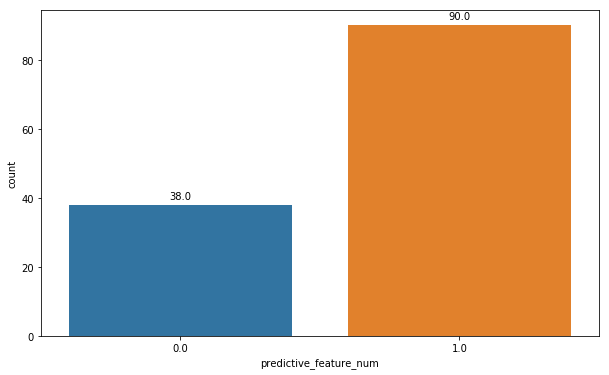

In [988]:
plt.figure(figsize = (10,6))
countplot = sns.countplot(x='predictive_feature_num', data=train_smote_n_2)
for p in countplot.patches:
    countplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [989]:
X_train_smote = train_smote_n_2.drop(columns = ['predictive_feature_num'])
y_train_smote = train_smote_n_2['predictive_feature_num']

In [990]:
len(X_train_smote), len(y_train_smote)

(128, 128)

In [991]:
from imblearn.over_sampling import SMOTE 

In [992]:
sm = SMOTE(random_state=42, k_neighbors=5, sampling_strategy = 1.0)

In [993]:
from collections import Counter

In [994]:
X_train_smote_2, y_train_smote_2 = sm.fit_sample(X_train_smote, y_train_smote)

In [995]:
len(X_train_smote_2), len(y_train_smote_2)

(180, 180)

In [996]:
#The new balance is 90/90 as shown
cnt = Counter()
for i in y_train_smote_2:
    cnt[i]+=1
cnt

Counter({1.0: 90, 0.0: 90})

In [997]:
#The previous balance 
cnt = Counter()
for i in y_train:
    cnt[i]+=1
cnt

Counter({1.0: 130, 0.0: 38})

In [998]:
gnb = GaussianNB()
gnb.fit(X_train_smote_2,y_train_smote_2)
gnb_pred = gnb.predict(X_train_smote_2)

print(metrics.accuracy_score(y_train_smote_2,gnb_pred))

0.6722222222222223


In [999]:
cm = confusion_matrix(y_train_smote_2,gnb_pred)
print(cm)

[[60 30]
 [29 61]]


In [1000]:
print(classification_report(y_train_smote_2, gnb_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.67      0.67        90
         1.0       0.67      0.68      0.67        90

    accuracy                           0.67       180
   macro avg       0.67      0.67      0.67       180
weighted avg       0.67      0.67      0.67       180



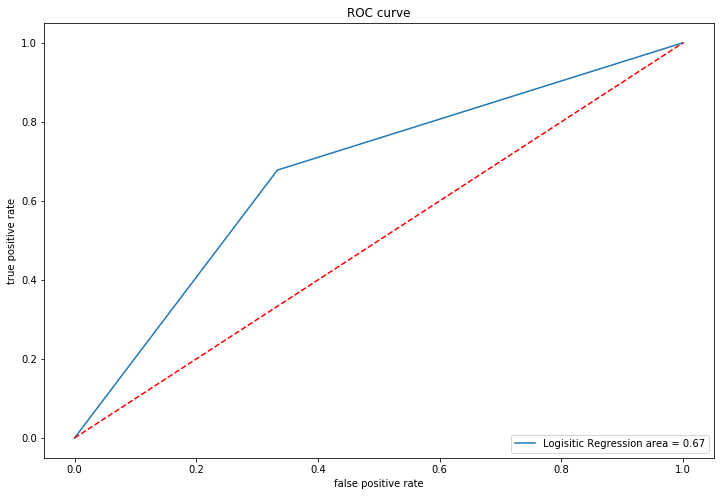

In [1001]:
fpr, tpr, _ = roc_curve(y_train_smote_2, gnb_pred.reshape(-1,1), pos_label = 1)
logit_roc_auc = roc_auc_score(y_train_smote_2, gnb_pred.reshape(-1,1))

plt.figure(figsize = (12,8))
plt.plot(fpr,tpr, label = 'Logisitic Regression area = %0.2f'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.title("ROC curve")
plt.legend(loc = "lower right")
plt.show()

In [1002]:
gnb = GaussianNB()
gnb.fit(X_train_smote_2,y_train_smote_2)

GaussianNB()

In [1003]:
gnb_pred = gnb.predict(X_test)

In [1004]:
print(metrics.accuracy_score(y_test,gnb_pred))

0.6666666666666666


In [1005]:
cm = confusion_matrix(y_test,gnb_pred)
print(cm)

[[ 4  5]
 [ 5 16]]


In [1006]:
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.44      0.44      0.44         9
           1       0.76      0.76      0.76        21

    accuracy                           0.67        30
   macro avg       0.60      0.60      0.60        30
weighted avg       0.67      0.67      0.67        30



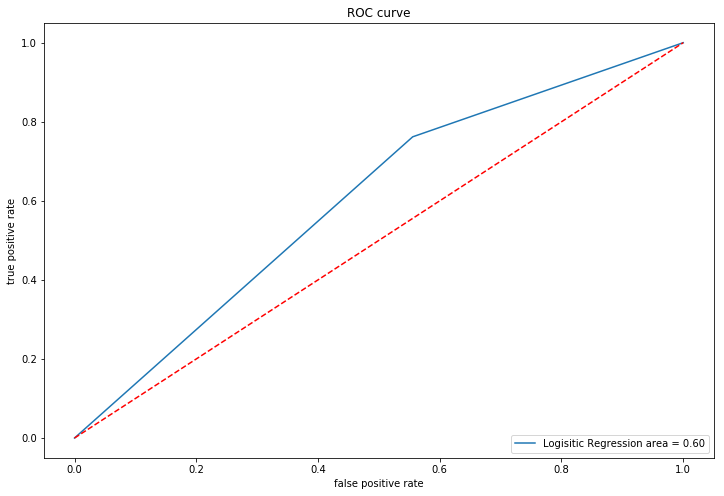

In [1007]:
fpr, tpr, _ = roc_curve(y_test, gnb_pred.reshape(-1,1), pos_label = 1)
logit_roc_auc = roc_auc_score(y_test, gnb_pred.reshape(-1,1))

plt.figure(figsize = (12,8))
plt.plot(fpr,tpr, label = 'Logisitic Regression area = %0.2f'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.title("ROC curve")
plt.legend(loc = "lower right")
plt.show()

# Q 2d (III) - EXTRA CREDIT

# 2D(I) - Train set

In [1010]:
from sklearn.naive_bayes import MultinomialNB

In [1011]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [1013]:
clf_pred = clf.predict(X_train)
print(metrics.accuracy_score(y_train,clf_pred))

0.6845238095238095


In [1014]:
cm = confusion_matrix(y_train,clf_pred)
print(cm)

[[16 22]
 [31 99]]


In [1015]:
print(classification_report(y_train, clf_pred))

              precision    recall  f1-score   support

         0.0       0.34      0.42      0.38        38
         1.0       0.82      0.76      0.79       130

    accuracy                           0.68       168
   macro avg       0.58      0.59      0.58       168
weighted avg       0.71      0.68      0.70       168



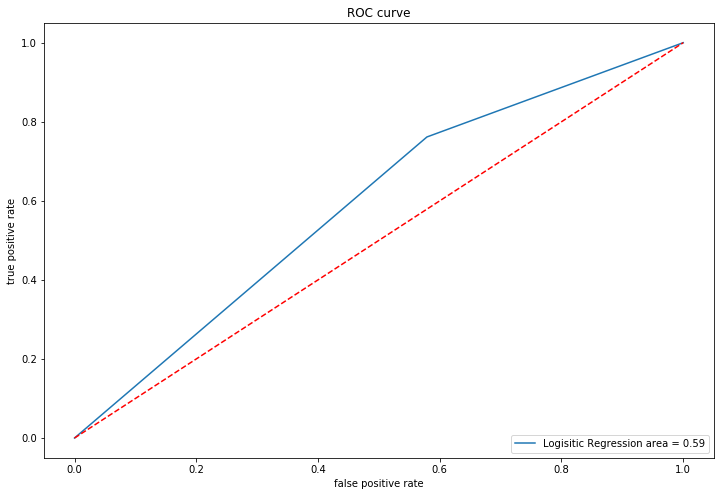

In [1016]:
fpr, tpr, _ = roc_curve(y_train, clf_pred.reshape(-1,1), pos_label = 1)
logit_roc_auc = roc_auc_score(y_train, clf_pred.reshape(-1,1))

plt.figure(figsize = (12,8))
plt.plot(fpr,tpr, label = 'Logisitic Regression area = %0.2f'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.title("ROC curve")
plt.legend(loc = "lower right")
plt.show()

# 2D(I) - Test set

In [1017]:
clf_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test,clf_pred))

0.6333333333333333


In [1018]:
cm = confusion_matrix(y_test,clf_pred)
print(cm)

[[ 3  6]
 [ 5 16]]


In [1019]:
print(classification_report(y_test, clf_pred))

              precision    recall  f1-score   support

           0       0.38      0.33      0.35         9
           1       0.73      0.76      0.74        21

    accuracy                           0.63        30
   macro avg       0.55      0.55      0.55        30
weighted avg       0.62      0.63      0.63        30



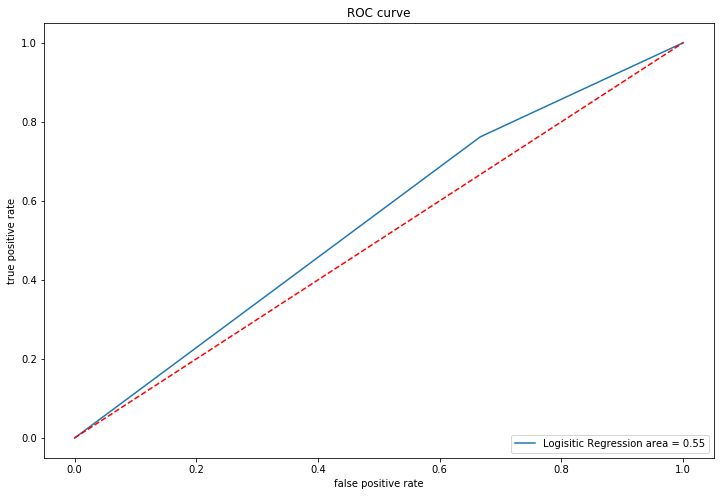

In [1020]:
fpr, tpr, _ = roc_curve(y_test, clf_pred.reshape(-1,1), pos_label = 1)
logit_roc_auc = roc_auc_score(y_test, clf_pred.reshape(-1,1))

plt.figure(figsize = (12,8))
plt.plot(fpr,tpr, label = 'Logisitic Regression area = %0.2f'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.title("ROC curve")
plt.legend(loc = "lower right")
plt.show()

# Q 2d (III) - EXTRA CREDIT

# 2D(II) - Train set

In [1021]:
clf = MultinomialNB()
clf.fit(X_train_smote_2,y_train_smote_2)
clf_pred = clf.predict(X_train_smote_2)

print(metrics.accuracy_score(y_train_smote_2,clf_pred))

0.5888888888888889


In [1022]:
cm = confusion_matrix(y_train_smote_2,clf_pred)
print(cm)

[[41 49]
 [25 65]]


In [1023]:
print(classification_report(y_train_smote_2, clf_pred))

              precision    recall  f1-score   support

         0.0       0.62      0.46      0.53        90
         1.0       0.57      0.72      0.64        90

    accuracy                           0.59       180
   macro avg       0.60      0.59      0.58       180
weighted avg       0.60      0.59      0.58       180



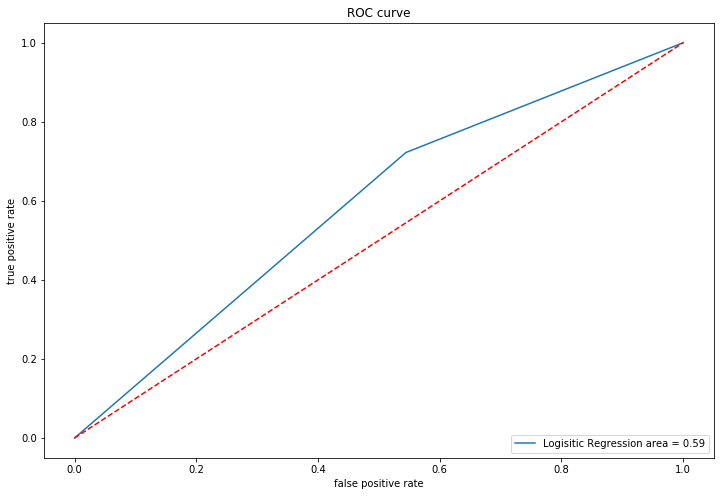

In [1024]:
fpr, tpr, _ = roc_curve(y_train_smote_2, clf_pred.reshape(-1,1), pos_label = 1)
logit_roc_auc = roc_auc_score(y_train_smote_2, clf_pred.reshape(-1,1))

plt.figure(figsize = (12,8))
plt.plot(fpr,tpr, label = 'Logisitic Regression area = %0.2f'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.title("ROC curve")
plt.legend(loc = "lower right")
plt.show()

# 2D(II) - Test set

In [1025]:
clf_pred = clf.predict(X_test)

print(metrics.accuracy_score(y_test,clf_pred))

0.6666666666666666


In [1026]:
cm = confusion_matrix(y_test,clf_pred)
print(cm)

[[ 3  6]
 [ 4 17]]


In [1027]:
print(classification_report(y_test, clf_pred))

              precision    recall  f1-score   support

           0       0.43      0.33      0.38         9
           1       0.74      0.81      0.77        21

    accuracy                           0.67        30
   macro avg       0.58      0.57      0.57        30
weighted avg       0.65      0.67      0.65        30



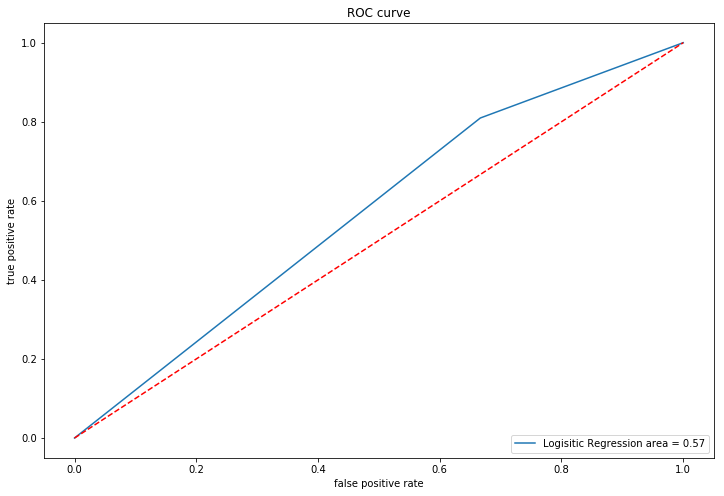

In [1028]:
fpr, tpr, _ = roc_curve(y_test, clf_pred.reshape(-1,1), pos_label = 1)
logit_roc_auc = roc_auc_score(y_test, clf_pred.reshape(-1,1))

plt.figure(figsize = (12,8))
plt.plot(fpr,tpr, label = 'Logisitic Regression area = %0.2f'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.title("ROC curve")
plt.legend(loc = "lower right")
plt.show()